In [113]:
 #let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import the required packages**

In [114]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# **Supervise Learning Project**

# **Part -A**

Normal.csv file


Type_H.csv file


Type_S.csv file

# **1. Data Understanding: [5 Marks]**

# **1.A.Read all the 3 CSV files as DataFrame and store them into 3 separate variables.** [1 Mark]

In [116]:
# NORMAL.CSV
normal = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Supervised Learning/project superwise learning/Part1+-+Normal.csv')
#Type_H_csv
typeH = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Supervised Learning/project superwise learning/Part1+-+Type_H.csv')
#Type_S_csv
TypeS = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Supervised Learning/project superwise learning/Part1+-+Type_S.csv')

# **1.B. Print Shape and columns of all the 3 DataFrames.** [1 Mark]

In [117]:
#normal data set
print("Shape of the normal dataset has ",normal.shape[0], 'rows and', normal.shape[1], "columns.")
print("Column names of normal dataset  ",normal.columns, )
normal.head()

Shape of the normal dataset has  100 rows and 7 columns.
Column names of normal dataset   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [118]:
#TypeS data set
print("Shape of the typeH dataset has ",typeH.shape[0], 'rows and', typeH.shape[1], "columns.")
print("Column names of typeH dataset  ",typeH.columns, )
typeH.head()

Shape of the typeH dataset has  60 rows and 7 columns.
Column names of typeH dataset   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [119]:
#TypeS data set
print("Shape of the TypeS dataset has ",TypeS.shape[0], 'rows and', TypeS.shape[1], "columns.")
print("Column names of TypeS dataset  ",TypeS.columns, )
TypeS.head()

Shape of the TypeS dataset has  150 rows and 7 columns.
Column names of TypeS dataset   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


# **1.C. Compare Column names of all the 3 DataFrames and clearly write observations.** [1 Mark]

In [120]:
# Check if all three DataFrames have the same column names
if normal.columns.equals(typeH.columns) and normal.columns.equals(TypeS.columns):
    print("All three Data set have the same column names.")
else:
    print(" All Dataset is mismatch column names.")

All three Data set have the same column names.


# **Observation**

1. Among dataframe , there are no mismatch/ differnt columns.

2. Among dataframe , there are equal and  same columns are followings

  ' P_incidence',    'P_tilt',   'L_angle',   'S_slope',    'P_radius',    'S_Degree','Class'

**WE CAN SEE SAME NAME  EVEN BY VISUALIZE  BAR PLOT**

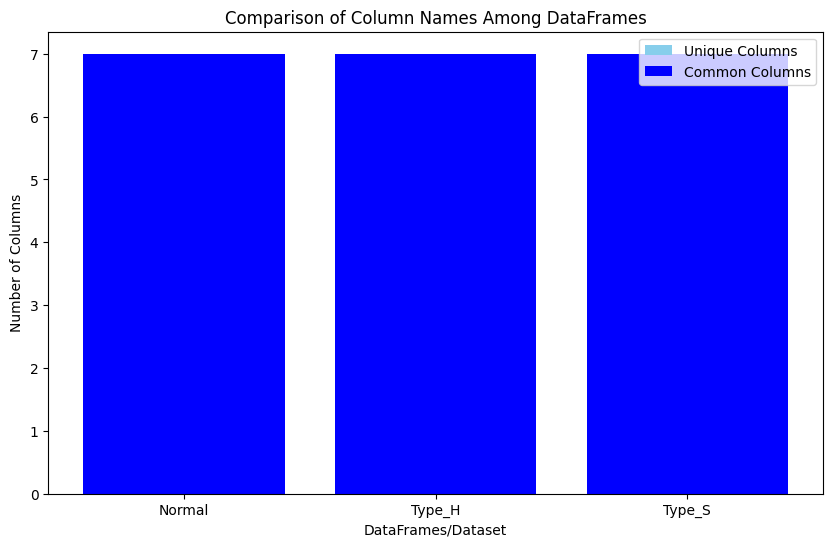

In [121]:
# Get the column names of Dataset
normal_columns = set(normal.columns)
typeH_columns = set(typeH.columns)
TypeS_columns = set(TypeS.columns)

# Find common column names
common_columns = normal_columns.intersection(typeH_columns, TypeS_columns)

# Find unique column names in each Data set
unique_normal_columns = normal_columns - common_columns
unique_typeH_columns = typeH_columns - common_columns
unique_TypeS_columns = TypeS_columns - common_columns

plt.figure(figsize=(10, 6))
plt.bar(['Normal', 'Type_H', 'Type_S'], [len(unique_normal_columns), len(unique_typeH_columns), len(unique_TypeS_columns)], color='skyblue', label='Unique Columns')
plt.bar(['Normal', 'Type_H', 'Type_S'], [len(common_columns)]*3, color='blue', label='Common Columns')

# Adding labels and title
plt.xlabel('DataFrames/Dataset')
plt.ylabel('Number of Columns')
plt.title('Comparison of Column Names Among DataFrames')
plt.legend()

# Show plot
plt.show()



# **1 D. Print DataTypes of all the 3 DataFrames.** [1 Mark]

In [122]:
# Normal dataset datatype
print("Data types columns of normal dataset  ",normal.dtypes, )

Data types columns of normal dataset   P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [123]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [124]:
# typeH dataset datatype
print("Data types columns of typeH dataset  ",typeH.dtypes, )

Data types columns of typeH dataset   P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [125]:
typeH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [ ]:
# TypeS dataset datatype
print("Data types columns of TypeS dataset  ",TypeS.dtypes, )

Data types columns of TypeS dataset   P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [126]:
TypeS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


# **1.E.Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.** [1 Mark]

In [127]:
# Check the distribution and categories of the 'Class' variable in normal DataFrame
print("Distribution and categories of 'Class' variable in normal DataFrame:")
print(normal['Class'].value_counts())
normal['Class'].isnull().sum()  # null value
normal['Class'].unique() # unique value

Distribution and categories of 'Class' variable in normal DataFrame:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64


array(['Normal', 'Nrmal'], dtype=object)

In [128]:
# Check the distribution and categories of the 'Class' variable in typeH DataFrame
print("Distribution and categories of 'Class' variable in typeH DataFrame:")
print(typeH['Class'].value_counts())
typeH['Class'].isnull().sum()  # null value
typeH['Class'].unique() # unique value

Distribution and categories of 'Class' variable in typeH DataFrame:
Class
Type_H    37
type_h    23
Name: count, dtype: int64


array(['Type_H', 'type_h'], dtype=object)

In [129]:
# Check the distribution and categories of the 'Class' variable in TypeS DataFrame
print("Distribution and categories of 'Class' variable in TypeS DataFrame:")
print(TypeS['Class'].value_counts())
TypeS['Class'].isnull().sum()  # null value
TypeS['Class'].unique() # unique value

Distribution and categories of 'Class' variable in TypeS DataFrame:
Class
Type_S    133
tp_s       17
Name: count, dtype: int64


array(['Type_S', 'tp_s'], dtype=object)

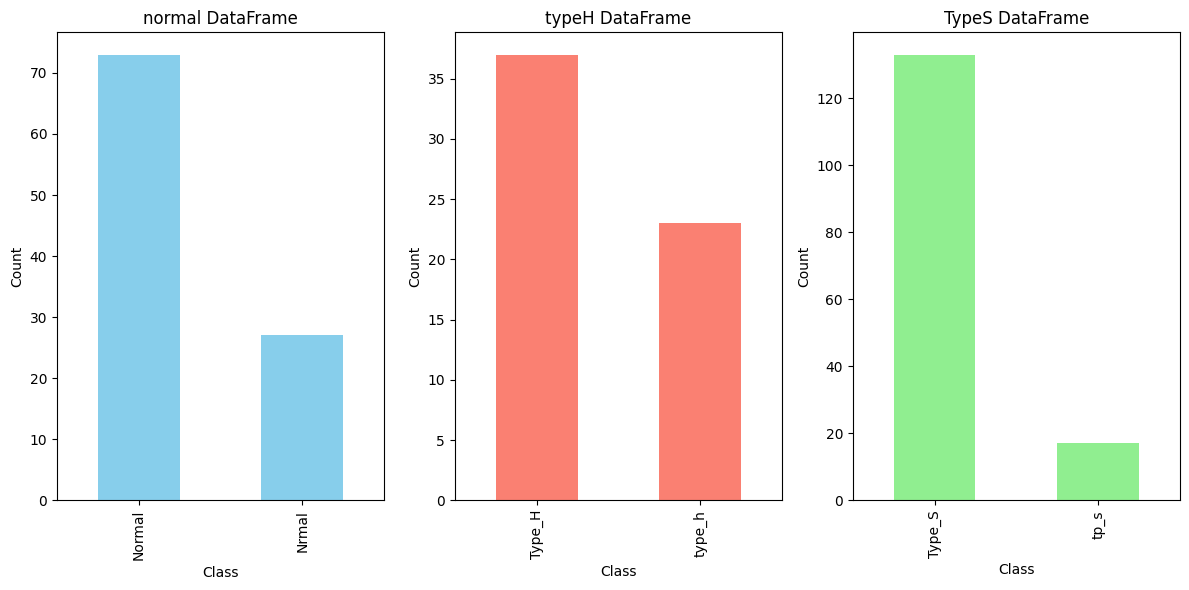

In [130]:
# Extract 'Class' column from each DataFrame
normal_class_counts = normal['Class'].value_counts()
typeH_class_counts = typeH['Class'].value_counts()
TypeS_class_counts = TypeS['Class'].value_counts()

# Plotting /VISUALIZE
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
normal_class_counts.plot(kind='bar', color='skyblue')
plt.title('normal DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
typeH_class_counts.plot(kind='bar', color='salmon')
plt.title('typeH DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
TypeS_class_counts.plot(kind='bar', color='lightgreen')
plt.title('TypeS DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.Data Preparation and Exploration** [5 Marks]

# **2.A.Unify all the variations in ‘Class’ feature for all the 3 DataFrames.** [1 Marks]

In [131]:
#  function to unify class labels for all DataFrames
def unify_class_labels(df):
    # Convert 'Class' column to lowercase
    df['Class'] = df['Class'].str.lower()
    #  a dictionary to map variations to a single consistent label
    class_mapping = {
        'normal': 'normal',
        'nrmal': 'normal',
        'typeh': 'type_h',
        'tp_s': 'type_s'
    }
    # Replace variations of the same class label
    df['Class'].replace(class_mapping, inplace=True)

# Unify class labels for all DataFrames
unify_class_labels(normal)
unify_class_labels(typeH)
unify_class_labels(TypeS)

# Verify the changes
print("Unique values in 'Class' column of normal DataFrame after unification:")
print(normal['Class'].unique())
print("\nUnique values in 'Class' column of typeH DataFrame after unification:")
print(typeH['Class'].unique())
print("\nUnique values in 'Class' column of TypeS DataFrame after unification:")
print(TypeS['Class'].unique())


Unique values in 'Class' column of normal DataFrame after unification:
['normal']

Unique values in 'Class' column of typeH DataFrame after unification:
['type_h']

Unique values in 'Class' column of TypeS DataFrame after unification:
['type_s']


In [132]:
# Check the distribution and categories of the 'Class' variable in normal DataFrame after unification
print("Distribution and categories of 'Class' variable in normal DataFrame:")
print(normal['Class'].value_counts())
normal['Class'].isnull().sum()  # null value
normal['Class'].unique() # unique value

Distribution and categories of 'Class' variable in normal DataFrame:
Class
normal    100
Name: count, dtype: int64


array(['normal'], dtype=object)

In [133]:
# Check the distribution and categories of the 'Class' variable in typeH DataFrame after unification
print("Distribution and categories of 'Class' variable in typeH DataFrame:")
print(typeH['Class'].value_counts())
typeH['Class'].isnull().sum()  # null value
typeH['Class'].unique() # unique value

Distribution and categories of 'Class' variable in typeH DataFrame:
Class
type_h    60
Name: count, dtype: int64


array(['type_h'], dtype=object)

In [134]:
# Check the distribution and categories of the 'Class' variable in TypeS DataFrame after unification
print("Distribution and categories of 'Class' variable in TypeS DataFrame:")
print(TypeS['Class'].value_counts())
TypeS['Class'].isnull().sum()  # null value
TypeS['Class'].unique() # unique value

Distribution and categories of 'Class' variable in TypeS DataFrame:
Class
type_s    150
Name: count, dtype: int64


array(['type_s'], dtype=object)

Text(0, 0.5, 'Count')

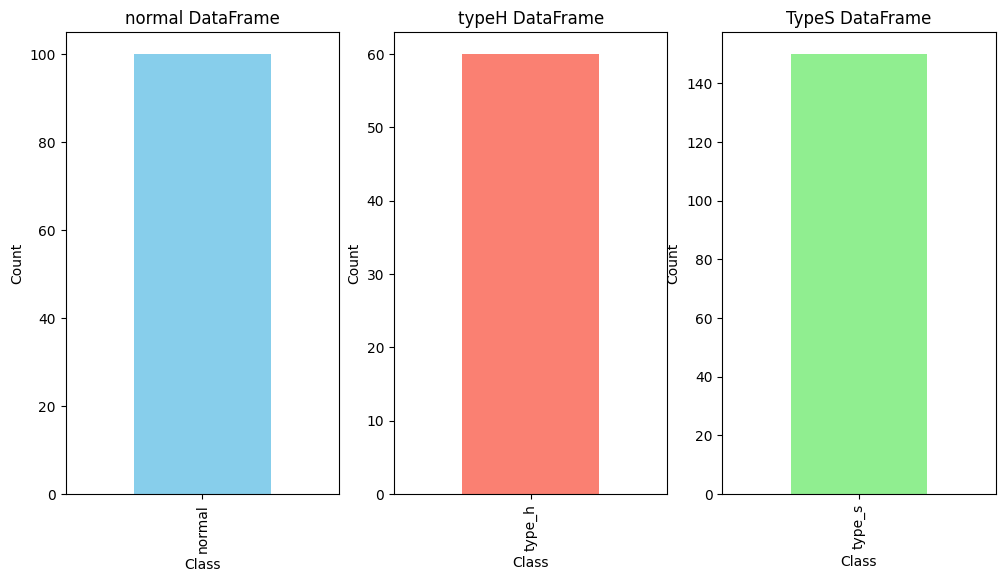

In [135]:
# After unification
# Extract 'Class' column from each DataFrame
normal_class_counts = normal['Class'].value_counts()
typeH_class_counts = typeH['Class'].value_counts()
TypeS_class_counts = TypeS['Class'].value_counts()

# Plotting/VISUALIZE
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
normal_class_counts.plot(kind='bar', color='skyblue')
plt.title('normal DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
typeH_class_counts.plot(kind='bar', color='salmon')
plt.title('typeH DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
TypeS_class_counts.plot(kind='bar', color='lightgreen')
plt.title('TypeS DataFrame')
plt.xlabel('Class')
plt.ylabel('Count')

# **2 B. Combine all the 3 DataFrames to form a single DataFrame** [1 Marks]

In [137]:
# CREATED NEW DATAFRAME NAME combined_df

# Combine all three DataFrames into a single DataFrame
combined_df = pd.concat([normal, typeH, TypeS], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    normal  
1    normal  
2    normal  
3    normal  
4    

# **2.C. Print 5 random samples of this DataFrame** [1 Marks]

In [138]:
# Print 5 random samples from the combined DataFrame
print(combined_df.sample(n=5))

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
112    48.915551  19.964556  40.263794  28.950995  119.321358   8.028895   
190    81.656032  28.748869  58.232821  52.907163  114.769856  30.609148   
160    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906   
208    63.172987   6.330911  63.000000  56.842076  110.644021  42.608076   
75     67.804694  16.550662  43.256802  51.254033  119.685645   4.867540   

      Class  
112  type_h  
190  type_s  
160  type_s  
208  type_s  
75   normal  


# **2.D. Print Feature-wise percentage of Null values.** [1 Mark]

In [139]:
# Calculate the percentage of null values for each feature
null_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100

# Print the feature-wise percentage of null values
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [140]:
pd.DataFrame({'Count':combined_df.isnull().sum()[combined_df.isnull().sum()>0],'Percentage':(combined_df.isnull().sum()[combined_df.isnull().sum()>0]/combined_df.shape[0])*100})

,Count,Percentage


# **2.E.Check 5-point summary of the new DataFrame.** [1 Mark]

In [141]:
# Get the 5-point summary of the new DataFrame
summary = combined_df.describe()

# Print the 5-point summary
print("5-point summary of the new DataFrame:")
print(summary)

5-point summary of the new DataFrame:
       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


In [142]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.Data Analysis:** [10 Marks]

# **3.A.Visualize a heatmap to understand correlation between all features** [2 Marks]

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [198]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a clustered heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Clustered Correlation Heatmap of Features')
plt.show()

ValueError: could not convert string to float: 'normal'

# **3.B. Share insights on correlation.** [2 Marks]



# **(3.B).A. Features having stronger correlation with correlation value.**

We can see above corr heatmap and clearly see that following features have

P_incidence              S_slope                 0.814960

S_slope                P_incidence              0.814960

L_angle                 P_incidence             0.717282

P_incidence            L_angle                  0.717282

S_Degree               P_incidence              0.638743

P_incidence            S_Degree                 0.638743

P_tilt                  P_incidence            0.629199

P_incidence            P_tilt                  0.629199

S_slope                L_angle                 0.598387

L_angle                S_slope                 0.598387

S_Degree               L_angle                 0.533667

L_angle                S_Degree                0.533667

S_Degree               S_slope                 0.523557

S_slope                S_Degree                0.523557

In [ ]:
# Extract correlation coefficients for all features
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out correlations of features with themselves (which are always 1.0)
correlation_values = correlation_values[correlation_values != 1.0]

# Print features with stronger correlation values
strong_correlations = correlation_values[abs(correlation_values) > 0.5]  # You can adjust the threshold as needed
print("Features with stronger correlation values (absolute correlation > 0.5):")
print(strong_correlations)


# **(3.B.)B. Features having weaker correlation with correlation value.**

We can see above corr heatmap and clearly see that following features have


Features with weaker correlation values (absolute correlation < 0.1):

P_radius  L_angle    -0.080344

L_angle   P_radius   -0.080344

P_radius  S_Degree   -0.026065

S_Degree  P_radius   -0.026065

P_tilt    P_radius    0.032668

P_radius  P_tilt      0.032668

P_tilt    S_slope     0.062345

S_slope   P_tilt      0.062345


In [ ]:
# Extract correlation coefficients for all features
correlation_values = correlation_matrix.unstack().sort_values(ascending=True)

# Filter out correlations of features with themselves (which are always 1.0)
correlation_values = correlation_values[correlation_values != 1.0]

# Print features with weaker correlation values
weak_correlations = correlation_values[abs(correlation_values) < 0.1]  # You can adjust the threshold as needed
print("Features with weaker correlation values (absolute correlation < 0.1):")
print(weak_correlations)

Features with weaker correlation values (absolute correlation < 0.1):
P_radius  L_angle    -0.080344
L_angle   P_radius   -0.080344
P_radius  S_Degree   -0.026065
S_Degree  P_radius   -0.026065
P_tilt    P_radius    0.032668
P_radius  P_tilt      0.032668
P_tilt    S_slope     0.062345
S_slope   P_tilt      0.062345
dtype: float64


# **3.C. Visualize a pairplot with 3 classes distinguished by colors and share insights.** [2 Marks]

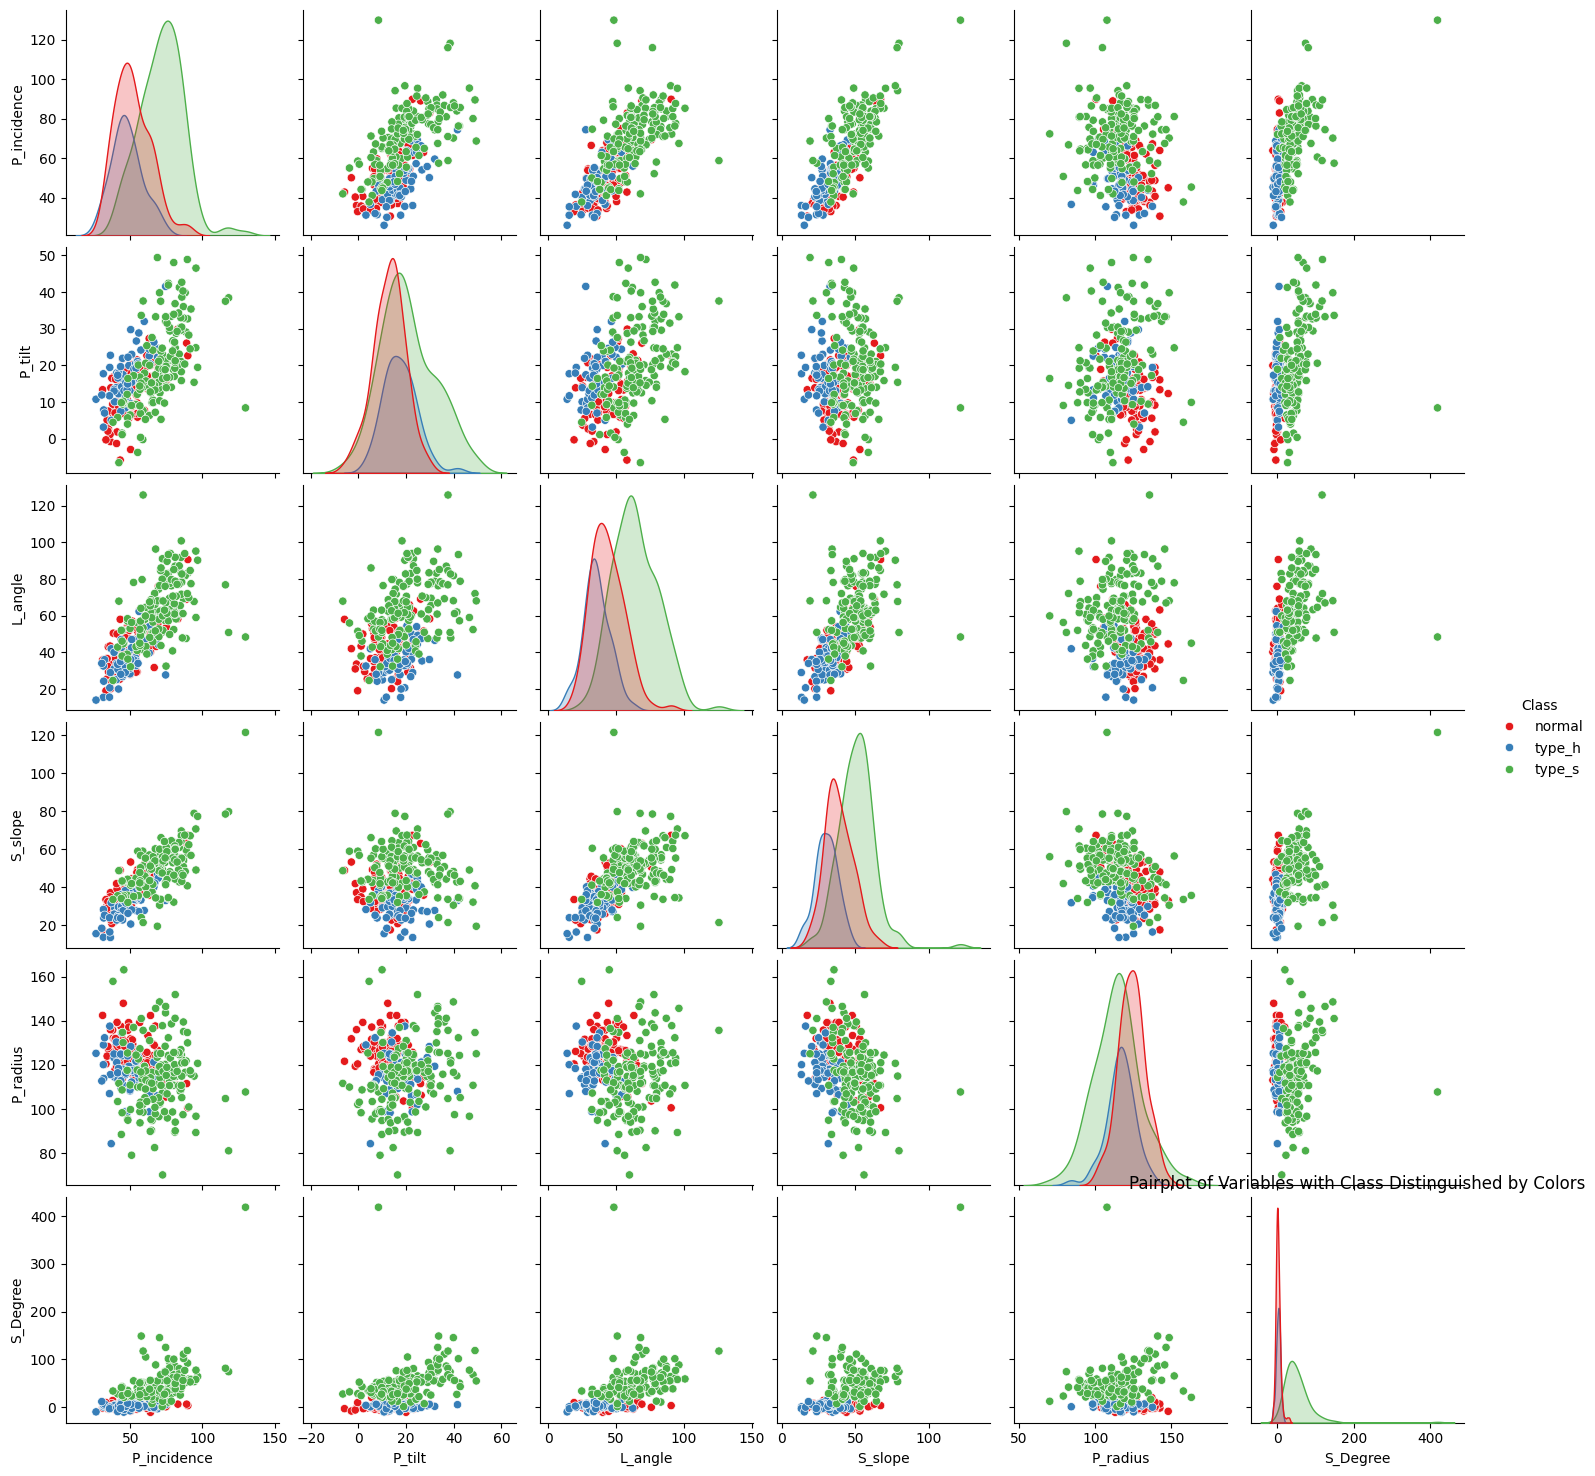

In [149]:
# Create pairplot with 'Class' categories distinguished by colors
sns.pairplot(combined_df, hue='Class', palette='Set1')
plt.title('Pairplot of Variables with Class Distinguished by Colors')
plt.show()

-There are 3 classes namely  normal ,type_h ,type_s having differnt colour representation in above pair plot.
- there are differnt features namely  ' P_incidence',    'P_tilt',   'L_angle',   'S_slope',    'P_radius',    'S_Degree'

-**Observations**

**1.  ----this pairplot having very strong corelation(1)** with distiqiush by classes( normal,type_h,type_s) of 3 dataframe.


P_incidence vs P_incidence

P_tilt vs P_tilt

L_angle vs L_angle
  
S_slope vs S_slope

P_radius  vs P_radius

S_Degree vs  S_Degree
  
   

 2. **following pairplot having stronger correlation** less than above among 3 classes

 P_incidence vs S_slope

S_slope vs P_incidence

L_angle vs P_incidence

P_incidence vs L_angle ...

S_Degree vs P_incidence

P_incidenc vs S_Degree

P_tilt P vs_incidence

P_incidence vs P_tilt

S_slope vs L_angle

L_angle vs S_slope

S_Degree vs L_angle

L_angle vs S_Degree

S_Degree vs S_slope

S_slope vs S_Degree

**3. following plots having weaker corelation among 3 classes**

P_radius vs  L_angle   

L_angle vs   P_radius  

P_radius vs  S_Degree   

S_Degree vs  P_radius   

P_tilt vs    P_radius    

P_radius vs P_tilt     

P_tilt vs    S_slope    

S_slope vs   P_tilt      

# **3.D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.** [2 Marks]

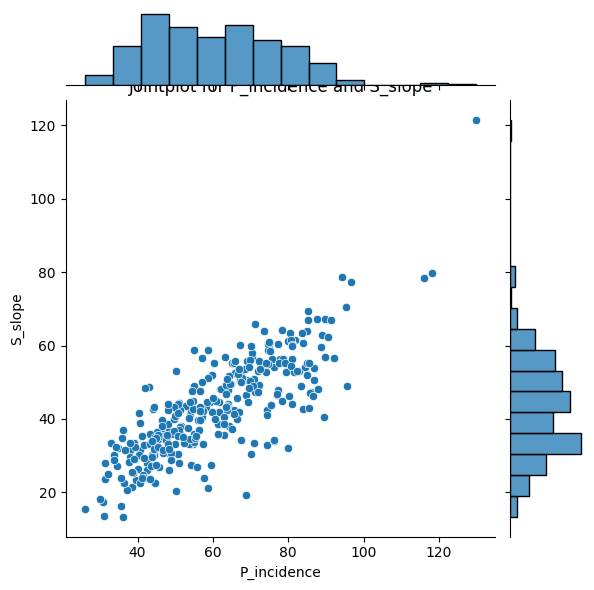

In [150]:
# Create a jointplot for 'P_incidence' and 'S_slope'
sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter')
plt.title('Jointplot for P_incidence and S_slope')
plt.show()

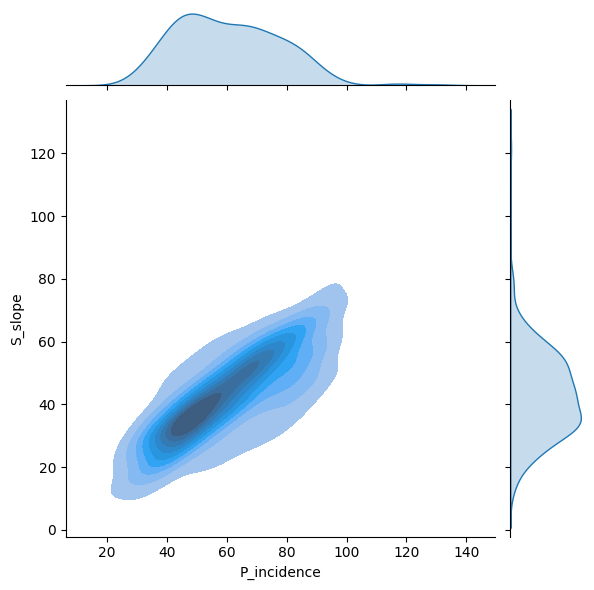

In [ ]:
sns.jointplot(data=combined_df, x='P_incidence', y='S_slope', kind="kde", fill=True);

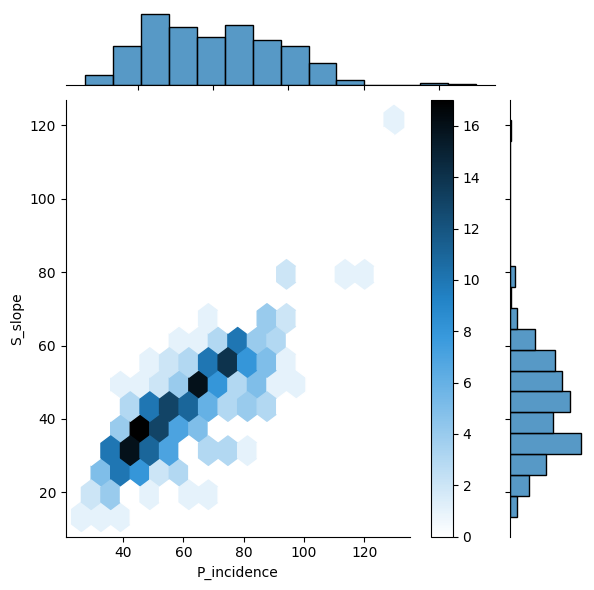

In [ ]:
sns.jointplot(data=combined_df, x='P_incidence', y='S_slope', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

# **Insight on above 2-join plot**

--- We can clearly seen in above  plots that both attribute value (P_incidence and S_slope ) increses Hence its positively correlated relationship between both attribute.

------there is also outlier present (scatter plot shows)

---------- there is highly densed data present in plots refere to strong correlation.

# **3.E.visualize a boxplot to check distribution of the features and share insights**. [2 Marks]

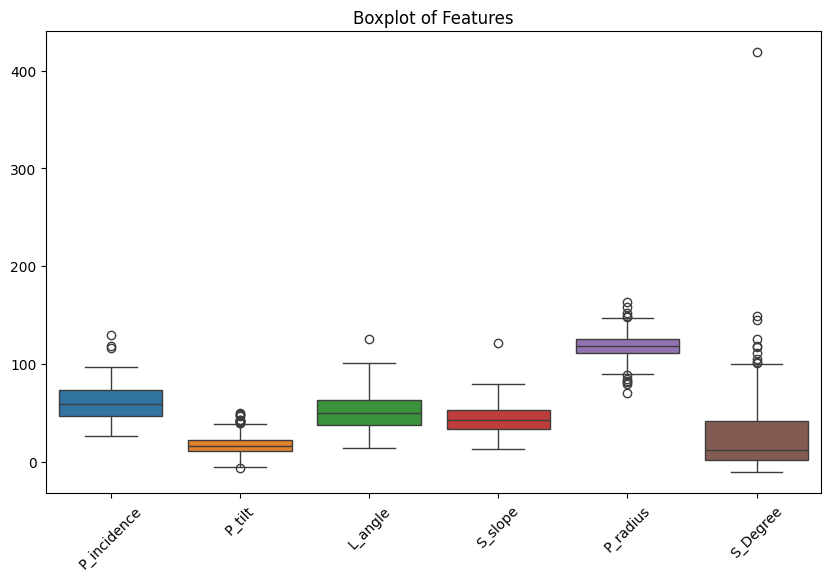

In [151]:

# Create a boxplot to check the distribution of features
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# **Insight on above Boxplot**

**similarity and differnces**

--we can observe P_Iincidence ,P_tilt ,L_angle,S_slope,P_radius, and gain insight that having median( central tendency) with not too much skewed distibution( right skewed/left skewed ) respective boxplots.

--median values of all attribute are not same as seen in plot.
 higher median value is P_radius followed by P_incidence ,L_angle,S_slope,S_Degree,P_tilt.

 ---- third quartile values is present in P_radius approcimate 160, and lower minimum value is in P_ tilt approximate 5, higher first quartile values in P_radius approximate 110. it means that P_ radius is one that having higher first quartile and higher third quartile data values.

**outlier**

 --- Every boxplot attreibute have outlier/extream values
 ----higher outlier present in S_Degree attribute and lower outlier present in L_angle and S_ slope and P_radius have outlier on upweard and downward direction.extreame value present in S_Degrre boxplot attribute


 **S_Degree  attribute having** outlier and median is oncloser to  left side and whisker is shorter is on left side so that its right skeweed and positelely skewed data. imp note that its have outlier having extreame value approximate above 400

 ---

# **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **4.Model Building: [6 Marks]**

# **4.A.Split data into X and Y. [1 Marks]**

In [152]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['Class'])  # Exclude the 'Class' column from features
Y = combined_df['Class']  # Select only the 'Class' column as the target variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
# 1 is just any random seed number

x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
114,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947
266,56.991404,6.874089,57.009005,50.117315,109.978045,36.810111
105,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
225,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759


# **4.B. Split data into train and test with 80:20 proportion.** [1 Marks]

In [153]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with an 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

x_train.head()


Shape of X_train: (248, 6)
Shape of X_test: (62, 6)
Shape of Y_train: (248,)
Shape of Y_test: (62,)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
114,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947
266,56.991404,6.874089,57.009005,50.117315,109.978045,36.810111
105,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
225,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759


# **4.C. Train a Supervised Learning Classification base model using KNN classifier**. [2 Marks]

In [154]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Once the model is trained, you can use it to make predictions on the test data if needed
# For example:
# predictions = knn_classifier.predict(X_test)


KNeighborsClassifier()

# **4.D. Print all the possible performance metrics for both train and test data.** [2 Marks]

# **Performance metrics include**


**Accuracy**:

**Precision**:

**Recall**:

**F1 Score**


**Confusion Matrix**:

**Classification Report**:

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predictions on training data
train_predictions = knn_classifier.predict(X_train)

# Predictions on testing data
test_predictions = knn_classifier.predict(X_test)


# Calculate performance metrics for training data
train_accuracy = accuracy_score(Y_train, train_predictions)
train_precision = precision_score(Y_train, train_predictions, average='weighted')
train_recall = recall_score(Y_train, train_predictions, average='weighted')
train_f1 = f1_score(Y_train, train_predictions, average='weighted')
train_confusion_matrix = confusion_matrix(Y_train, train_predictions)
train_classification_report = classification_report(Y_train, train_predictions)


# Calculate performance metrics for testing data
test_accuracy = accuracy_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions, average='weighted')
test_recall = recall_score(Y_test, test_predictions, average='weighted')
test_f1 = f1_score(Y_test, test_predictions, average='weighted')
test_confusion_matrix = confusion_matrix(Y_test, test_predictions)
test_classification_report = classification_report(Y_test, test_predictions)



# Print performance metrics for training data
print("Performance metrics for training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)



# Print performance metrics for testing data
print("\nPerformance metrics for testing data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)


Performance metrics for training data:
Accuracy: 0.9032258064516129
Precision: 0.9027423186323194
Recall: 0.9032258064516129
F1 Score: 0.901690945698068
Confusion Matrix:
[[ 70   7   2]
 [ 14  34   0]
 [  1   0 120]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.82      0.89      0.85        79
      type_h       0.83      0.71      0.76        48
      type_s       0.98      0.99      0.99       121

    accuracy                           0.90       248
   macro avg       0.88      0.86      0.87       248
weighted avg       0.90      0.90      0.90       248


Performance metrics for testing data:
Accuracy: 0.7580645161290323
Precision: 0.7663817663817664
Recall: 0.7580645161290323
F1 Score: 0.7571085400529465
Confusion Matrix:
[[16  4  1]
 [ 7  5  0]
 [ 3  0 26]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.62      0.76      0.68        21
      type_h       0.56      0.42     

# **------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **5.Performance Improvement:** [4 Marks]

# **5.A.Experiment with various parameters to improve performance of the base model.** [2 Marks]

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(test_classification_report)

Classification Report:
              precision    recall  f1-score   support

      normal       0.62      0.76      0.68        21
      type_h       0.56      0.42      0.48        12
      type_s       0.96      0.90      0.93        29

    accuracy                           0.76        62
   macro avg       0.71      0.69      0.70        62
weighted avg       0.77      0.76      0.76        62



In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [ 10,12,15,18,20,22,25,28,30],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, Y_train)

# Evaluate the best model on the testing data
best_accuracy = best_knn_classifier.score(X_test, Y_test)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Accuracy on Testing Data (with best parameters):", best_accuracy)


Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 20}
Best Cross-Validation Score: 0.8426938775510205
Accuracy on Testing Data (with best parameters): 0.7903225806451613


In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [17,19,23,25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]  # For Minkowski distance (p=1: Manhattan, p=2: Euclidean)
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the model with the best parameters
best_knn_classifier.fit(X_train, Y_train)

# Make predictions on the test data
test_predictions = best_knn_classifier.predict(X_test)

# Generate the classification report
report = classification_report(Y_test, test_predictions)

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("\nImproved Classification Report:")
print(report)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 17, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.8426938775510205

Improved Classification Report:
              precision    recall  f1-score   support

      normal       0.71      0.81      0.76        21
      type_h       0.64      0.58      0.61        12
      type_s       0.96      0.90      0.93        29

    accuracy                           0.81        62
   macro avg       0.77      0.76      0.76        62
weighted avg       0.81      0.81      0.81        62



# **5.B. Clearly showcase improvement in performance achieved.** [1 Marks]

For Example:

A. Accuracy: +15% improvement

B. Precision: +10% improvement.

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [17,19,23,25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]  # For Minkowski distance (p=1: Manhattan, p=2: Euclidean)
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the model with the best parameters
best_knn_classifier.fit(X_train, Y_train)

# Make predictions on the test data
test_predictions = best_knn_classifier.predict(X_test)

# Generate the classification report
report = classification_report(Y_test, test_predictions)

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("\nImproved Classification Report:")
print(report)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 17, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.8426938775510205

Improved Classification Report:
              precision    recall  f1-score   support

      normal       0.71      0.81      0.76        21
      type_h       0.64      0.58      0.61        12
      type_s       0.96      0.90      0.93        29

    accuracy                           0.81        62
   macro avg       0.77      0.76      0.76        62
weighted avg       0.81      0.81      0.81        62




# **Default performance**

A. Accuracy: 76%

B. Precision: 71%

C. recall - 69%

D. f1-score- 70%




# **performance improved**

A. Accuracy: 5% improvement

B. Precision: 6% improvement.

C. recall - 7%

D. f1-score- 6%


By analysing above referance

by selecting differnt k values ,its improve the performance by reducing k values.


# **5.C. Clearly state which parameters contributed most to improve model performance**. [1 Marks]

Best Parameters:improved model performance

'algorithm': 'auto',   'leaf_size': 10,   'n_neighbors': 17,   'p': 2, 'weights': 'distance'

In [160]:
# Extract the best parameters from the grid search results
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 17, 'p': 2, 'weights': 'distance'}


# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Part -B**

Data2.CSV

Data1.CSV

# **1. Data Understanding: [5 Marks]**

# **1.A.Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.** [1 Marks]

In [161]:
data1 = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Supervised Learning/project superwise learning/Data1.csv')

data2 = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Supervised Learning/project superwise learning/Data2.csv')

# **1.B. Print shape and Column Names and DataTypes of both the Dataframes.** [1 Marks]

In [162]:
# Data1 dataset
print("Shape of the data1 dataset has ",data1.shape[0], 'rows and', data1.shape[1], "columns.")
print("Column names of data1 dataset  ",data1.columns, )
data1.head()
data1.info()


Shape of the data1 dataset has  5000 rows and 8 columns.
Column names of data1 dataset   Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [163]:
data1.dtypes #  check datatype

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [164]:
# Data2 dataset
print("Shape of the data2 dataset has ",data2.shape[0], 'rows and', data2.shape[1], "columns.")
print("Column names of data2 dataset  ",data2.columns, )
data2.head()
data2.info()

Shape of the data2 dataset has  5000 rows and 7 columns.
Column names of data2 dataset   Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [165]:
data2.dtypes #  check datatype

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [166]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [167]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


# **1.C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame.**[2 Marks]

In [168]:
# Merge data1 and data2 on 'ID' feature
new_merged_Dataframe = pd.merge(data1, data2, on='ID')

# Print the merged DataFrame
print("its mearged (data1 and data2)and stored into  new_merged_Dataframe variable :")
print(new_merged_Dataframe)

its mearged (data1 and data2)and stored into  new_merged_Dataframe variable :
        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0        1   25              1            49    91107            4   
1        2   45             19            34    90089            3   
2        3   39             15            11    94720            1   
3        4   35              9           100    94112            1   
4        5   35              8            45    91330            4   
...    ...  ...            ...           ...      ...          ...   
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28              4            83    92612            3   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0   

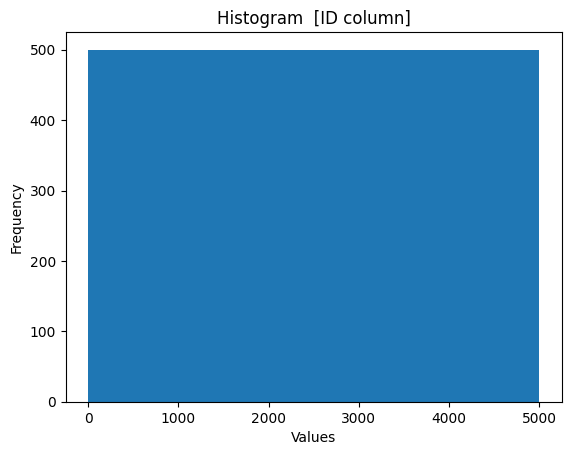

In [169]:
# Visualize the merged DataFrame ( by plotting a histogram of a column)
plt.hist(new_merged_Dataframe['ID'], bins=10)
plt.title('Histogram  [ID column]')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# **1.D. Change Datatype of below features to ‘Object’** [1 Marks]

# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [170]:
data1.dtypes #  check datatype

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [171]:
data2.dtypes #  check datatype

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [172]:
new_merged_Dataframe.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [173]:
# List of features to change data type to 'Object'
features_tobe_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

# Change data type of specified features to 'Object'
new_merged_Dataframe[features_tobe_convert] = new_merged_Dataframe[features_tobe_convert].astype('object')


# Print the updated data types of the DataFrame to verify the changes
print("Updated Data Types:")
print(new_merged_Dataframe.dtypes)

Updated Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


In [174]:
new_merged_Dataframe.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


## **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.Data Exploration and Analysis:** [5 Marks]

# **2.A.Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.** [2 Marks]

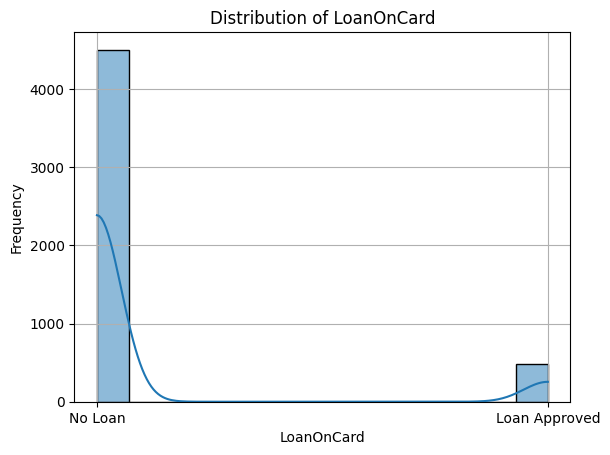

In [175]:
sns.histplot(data=new_merged_Dataframe, x='LoanOnCard', kde=True);
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Loan', 'Loan Approved'])
plt.grid(True)
plt.show()

In [176]:
print(new_merged_Dataframe['LoanOnCard'].value_counts())
new_merged_Dataframe['LoanOnCard'].isnull().sum()  # null value
new_merged_Dataframe['LoanOnCard'].unique() # unique value

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64


array([nan,  1.,  0.])

# **Insight on Loan on card**

--- 4500 customers has not taken loan on credit card.it represented as 'No Loan' on graph.

--- 480 customers has taken Loan on credit card. its represented as 'Loan Approved' on the graph

----------Remaining has nan value



# **2.B. Check the percentage of missing values and impute if required.** [1 Marks]

In [177]:
# Calculate the percentage of null values for each feature
null_percentage = (new_merged_Dataframe.isnull().sum() / len(new_merged_Dataframe)) * 100

# Print the feature-wise percentage of null values
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [178]:
pd.DataFrame({'Count':new_merged_Dataframe.isnull().sum()[new_merged_Dataframe.isnull().sum()>0],'Percentage':(new_merged_Dataframe.isnull().sum()[new_merged_Dataframe.isnull().sum()>0]/new_merged_Dataframe.shape[0])*100})

,Count,Percentage
LoanOnCard,20,0.4


Imputation is not require as long as its states only weather customer has taken loan on credit card or not. Nan value does not affect the result

In [179]:
# Replace NaN values with 0 in the DataFrame
new_merged_Dataframe.fillna(0, inplace=True)

In [180]:
pd.DataFrame({'Count':new_merged_Dataframe.isnull().sum()[new_merged_Dataframe.isnull().sum()>0],'Percentage':(new_merged_Dataframe.isnull().sum()[new_merged_Dataframe.isnull().sum()>0]/new_merged_Dataframe.shape[0])*100})

,Count,Percentage


In [181]:
# Calculate the percentage of null values for each feature
null_percentage = (new_merged_Dataframe.isnull().sum() / len(new_merged_Dataframe)) * 100

# Print the feature-wise percentage of null values
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


# **2.C. Check for unexpected values in each categorical variable and impute with best suitable value.** [2 Marks]    

# **not complete**

In [182]:
# Step 1: Identify categorical variables
categorical_variables = new_merged_Dataframe.select_dtypes(include=['object']).columns

# Step 2: Replace non-0/1 values with mode value
for column in categorical_variables:
    # Check if there are unique values other than '0' and '1'
    if set(new_merged_Dataframe[column].unique()) != {'0', '1'}:
        # Calculate mode value excluding '0' and '1'
        mode_value = new_merged_Dataframe[column][~new_merged_Dataframe[column].isin(['0', '1'])].mode()[0]
        # Replace non-'0' and non-'1' values with mode value
        new_merged_Dataframe.loc[~new_merged_Dataframe[column].isin(['0', '1']), column] = mode_value

        # Print message indicating completion
print("Replacement of non-0/1 values with mode value completed.")


Replacement of non-0/1 values with mode value completed.


# **----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3.Data Preparation and model building: [10 Marks]**

# **3.A.Split data into X and Y.** [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [183]:
# Drop 'ID' and 'ZipCode' columns and assign the remaining columns to X
X = new_merged_Dataframe.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)

# Assign the 'LoanOnCard' column to Y
Y = new_merged_Dataframe['LoanOnCard']

# Print the shapes of X and Y to verify
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (5000, 11)
Shape of Y: (5000,)


In [184]:
X.head()


,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,1,1.6,1,0,0,0,1,0
1,45,19,34,1,1.5,1,0,0,0,1,0
2,39,15,11,1,1.0,1,0,0,0,1,0
3,35,9,100,1,2.7,1,0,0,0,1,0
4,35,8,45,1,1.0,1,0,0,0,1,0


# **3.B. Split data into train and test. Keep 25% data reserved for testing.** [1 Marks]

In [185]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

# Print the shapes of the train and test sets to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

X_train.head()


Shape of X_train: (3750, 11)
Shape of X_test: (1250, 11)
Shape of Y_train: (3750,)
Shape of Y_test: (1250,)


,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1790,44,20,43,1,0.3,1,0,0,0,1,0
149,48,22,42,1,2.2,1,0,0,0,1,0
2819,63,37,10,1,0.4,1,0,0,0,1,0
1925,43,19,81,1,0.3,1,218,0,0,1,0
4843,61,34,41,1,2.5,1,0,0,0,1,0


# **3.C. Train a Supervised Learning Classification base model - Logistic Regression.** [2 Marks]

In [186]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train, Y_train)

# Print a message indicating that training is complete
print("Logistic Regression model training completed.")


Logistic Regression model training completed.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **3.D. Print evaluation metrics for the model and clearly share insights.** [1 Marks]

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
Y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Evaluation Metrics:
Accuracy: 0.912
Precision: 0.5866666666666667
Recall: 0.35772357723577236
F1 Score: 0.4444444444444445
Confusion Matrix:
 [[1096   31]
 [  79   44]]


# **Insight**


These evaluation metrics provide a comprehensive understanding of how well the model performs in classifying the data.

**Accuracy** measures the overall correctness of the predictions,

**precision** indicates the proportion of correctly predicted positive cases among all predicted positive cases,
  
**recall** measures the proportion of correctly predicted positive cases among all actual positive cases,
   
**F1-score** balances precision and recall.
   
**Confusion matrix** provides detailed information about true positive, false positive, true negative, and false negative predictions.

# **3.E. Balance the data using the right balancing technique.** [2 Marks]

In [188]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Check for class imbalance
target_distribution = new_merged_Dataframe['LoanOnCard'].value_counts()

# If there is class imbalance
if target_distribution.min() != target_distribution.max():
    # Upsampling the minority class
    minority_class = new_merged_Dataframe[new_merged_Dataframe['LoanOnCard'] == 1]
    majority_class = new_merged_Dataframe[new_merged_Dataframe['LoanOnCard'] == 0]
    upsampled_minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

    # Combine majority class with upsampled minority class
    balanced_data_upsampled = pd.concat([majority_class, upsampled_minority_class])

    # Downsampling the majority class
    downsampled_majority_class = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

    # Combine minority class with downsampled majority class
    balanced_data_downsampled = pd.concat([minority_class, downsampled_majority_class])

    # Using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, Y_resampled = smote.fit_resample(X, Y)
else:
    print("Data is already balanced.")


# **3.E.i.Check distribution of the target variable**

# **ii.Say output is class A : 20% and class B : 80%**
# **iii.Here you need to balance the target variable as 50:50**

# **iv.Try appropriate method to achieve the same.**

In [189]:
from sklearn.utils import resample

# Separate classes A and B
class_A = new_merged_Dataframe[new_merged_Dataframe['LoanOnCard'] == 0]
class_B = new_merged_Dataframe[new_merged_Dataframe['LoanOnCard'] == 1]

# Check the distribution of the target variable before balancing
target_distribution_before = new_merged_Dataframe['LoanOnCard'].value_counts(normalize=True)

# Print the distribution before balancing
print("Distribution of the target variable before balancing:")
print(target_distribution_before)

# Upsample the minority class (class A) to match the size of the majority class (class B)
upsampled_class_A = resample(class_A, replace=True, n_samples=len(class_B), random_state=42)

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([class_B, upsampled_class_A])

# Check the distribution of the target variable after balancing
target_distribution_after = balanced_data['LoanOnCard'].value_counts(normalize=True)

# Print the distribution after balancing
print("\nDistribution of the target variable after balancing:")
print(target_distribution_after)


Distribution of the target variable before balancing:
LoanOnCard
0.0    0.904
1.0    0.096
Name: proportion, dtype: float64

Distribution of the target variable after balancing:
LoanOnCard
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


# **3.F.Again train the same previous model on balanced data.** [1 Marks]

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Step 1: Prepare balanced dataset (already done in the previous step)

# Step 2: Split the balanced dataset into features (X) and target variable (Y)
X_balanced = balanced_data.drop('LoanOnCard', axis=1)
Y_balanced = balanced_data['LoanOnCard']

# Step 3: Split the data into training and testing sets (keeping 25% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.25, random_state=3)

# Step 4: Train the logistic regression model on the balanced training data
logreg_balanced = LogisticRegression()
logreg_balanced.fit(X_train, Y_train)

# Step 5: Evaluate the model's performance on the balanced test data
Y_pred_balanced = logreg_balanced.predict(X_test)
print("Classification Report on Balanced Test Data:")
print(classification_report(Y_test, Y_pred_balanced))


Classification Report on Balanced Test Data:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       116
         1.0       0.85      0.90      0.87       124

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



# **3.G.Print evaluation metrics and clearly share differences observed**. [2 Marks]

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Evaluate the logistic regression model trained on the original data
# Predict on the test set
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train, Y_train)

# Print a message indicating that training is complete
print("Logistic Regression model training completed.")


Y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Model Trained on Original Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Step 2: Evaluate the logistic regression model trained on the balanced data
Y_pred_balanced = logreg_balanced.predict(X_test)
print("\nEvaluation Metrics for Model Trained on Balanced Data:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_balanced))
print("Precision:", precision_score(Y_test, Y_pred_balanced))
print("Recall:", recall_score(Y_test, Y_pred_balanced))
print("F1 Score:", f1_score(Y_test, Y_pred_balanced))

# Step 3: Compare the performance metrics
print("\nDifferences Observed:")
print("Accuracy Difference:", accuracy_score(Y_test, Y_pred_balanced) - accuracy_score(Y_test, Y_pred))
print("Precision Difference:", precision_score(Y_test, Y_pred_balanced) - precision_score(Y_test, Y_pred))
print("Recall Difference:", recall_score(Y_test, Y_pred_balanced) - recall_score(Y_test, Y_pred))
print("F1 Score Difference:", f1_score(Y_test, Y_pred_balanced) - f1_score(Y_test, Y_pred))


Logistic Regression model training completed.
Evaluation Metrics for Model Trained on Original Data:
Accuracy: 0.8625
Precision: 0.8473282442748091
Recall: 0.8951612903225806
F1 Score: 0.8705882352941176
Confusion Matrix:
 [[ 96  20]
 [ 13 111]]

Evaluation Metrics for Model Trained on Balanced Data:
Accuracy: 0.8625
Precision: 0.8473282442748091
Recall: 0.8951612903225806
F1 Score: 0.8705882352941176

Differences Observed:
Accuracy Difference: 0.0
Precision Difference: 0.0
Recall Difference: 0.0
F1 Score Difference: 0.0


# **observation**


Accuracy Difference: 0.0

Precision Difference: 0.0

Recall Difference: 0.0

F1 Score Difference: 0.0

# **------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **4. Performance Improvement:** [10 Marks]

# **4.A.Train a base model each for SVM, KNN.** [4 Marks]

In [192]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Step 1: Prepare balanced dataset (already done in the previous step)

# Step 2: Split the balanced dataset into features (X) and target variable (Y)
X_balanced = balanced_data.drop('LoanOnCard', axis=1)
Y_balanced = balanced_data['LoanOnCard']

# Step 3: Split the data into training and testing sets (keeping 25% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.25, random_state=3)


# Step 1: Train SVM Model

svm_model = SVC(kernel='linear', random_state=42)  # Example: using linear kernel
svm_model.fit(X_balanced, Y_balanced)


SVC(kernel='linear', random_state=42)

In [193]:
# Step 2: Train KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_balanced, Y_balanced)


KNeighborsClassifier()

# **4.B. Tune parameters for each of the models wherever required and finalize a model.** [3 Marks]

**Tune parameters for SVM models wherever required and finalized a model.**

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Initialize GridSearchCV for SVM
svm_grid_search = GridSearchCV(SVC(random_state=3), param_grid=svm_param_grid, cv=5)

# Perform grid search on balanced data
svm_grid_search.fit(X_balanced, Y_balanced)

# Get the best parameters
best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_
print(best_svm_params);

print(best_svm_model);


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=0.1, kernel='linear', random_state=3)


**Tune parameters for KNN models wherever required and finalized a model**.

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Initialize GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=5)

# Perform grid search on balanced data
knn_grid_search.fit(X_balanced, Y_balanced)

# Get the best parameters
best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_


print(best_knn_params);

print(best_knn_model);

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')


# **4 C. Print evaluation metrics for final model. [1 Marks]**

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
knn_model = KNeighborsClassifier()

knn_model.fit(X_balanced, Y_balanced)


# Make predictions using the KNN model/ final model
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics for final model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

# Print evaluation metrics for final model
print("Evaluation Metrics for KNN Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Evaluation Metrics for KNN Model:
Accuracy: 0.7833333333333333
Precision: 0.8
Recall: 0.7741935483870968
F1 Score: 0.7868852459016393
Confusion Matrix:
 [[92 24]
 [28 96]]


# **4.D.Share improvement achieved from base model to final model. [2 Marks]**

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Evaluate the logistic regression model trained on the original data/Base model
# Predict on the test set
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train, Y_train)

# Print a message indicating that training is complete
print("Logistic Regression model training completed.")


Y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics for base model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Model Trained on Original Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Calculate evaluation metrics FOR Final model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

# Step 2: Evaluate the KNN MODEL model trained on the FINAL  data
# Make predictions using the KNN model
y_pred = knn_model.predict(X_test)
# Print evaluation metrics
print("Evaluation Metrics for KNN Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Step 3: Compare the performance metrics
print("\nDifferences Observed:")
print("Accuracy Difference:", accuracy_score(Y_test, y_pred) - accuracy_score(Y_test, Y_pred))
print("Precision Difference:", precision_score(Y_test, y_pred) - precision_score(Y_test, Y_pred))
print("Recall Difference:", recall_score(Y_test, y_pred) - recall_score(Y_test, Y_pred))
print("F1 Score Difference:", f1_score(Y_test, y_pred) - f1_score(Y_test, Y_pred))


Logistic Regression model training completed.
Evaluation Metrics for Model Trained on Original Data:
Accuracy: 0.8625
Precision: 0.8473282442748091
Recall: 0.8951612903225806
F1 Score: 0.8705882352941176
Confusion Matrix:
 [[ 96  20]
 [ 13 111]]
Evaluation Metrics for KNN Model:
Accuracy: 0.7833333333333333
Precision: 0.8
Recall: 0.7741935483870968
F1 Score: 0.7868852459016393
Confusion Matrix:
 [[92 24]
 [28 96]]

Differences Observed:
Accuracy Difference: -0.07916666666666672
Precision Difference: -0.047328244274809084
Recall Difference: -0.12096774193548387
F1 Score Difference: -0.08370298939247822


Logistic Regression model training completed.

Evaluation Metrics for Model Trained on Original Data:

Accuracy: 0.8625

Precision: 0.8473282442748091

Recall: 0.8951612903225806

F1 Score: 0.8705882352941176

Confusion Matrix:

 [[ 96  20]
 [ 13 111]]
Evaluation Metrics for KNN Model:

Accuracy: 0.783333333333333
3
Precision: 0.8

Recall: 0.7741935483870968

F1 Score: 0.7868852459016393

Confusion Matrix:

 [[92 24]
 [28 96]]

Differences Observed:

Accuracy Difference: -0.07916666666666672

Precision Difference: -0.047328244274809084

Recall Difference: -0.12096774193548387

F1 Score Difference: -0.08370298939247822
